# Credit EDA

### Import libraries and set plotting style

In [15]:
import os
import sys
import glob

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from itertools import product

sys.path.append('../scr')
from analysis import *
from data_preprocessing import *
from plot import *
from utils import *

sns.set_style("darkgrid")

 ### Feature Numbers and Model Types

In [16]:
feature_numbers = ['9', '20']  
model_types = ['LP','RP', 'LB', 'RB' ]  

### Load CSV files

In [17]:
df = load_and_clean_predictions('credit','predictions', feature_numbers, model_types, data_path='../predictions/')

Loaded file: ../predictions/credit_predictions_9LP_1204_2151.csv for model 9LP
Loaded file: ../predictions/credit_predictions_9RP_1204_2202.csv for model 9RP
Loaded file: ../predictions/credit_predictions_9LB_1204_2208.csv for model 9LB
Loaded file: ../predictions/credit_predictions_9RB_1204_2218.csv for model 9RB
Loaded file: ../predictions/credit_predictions_20LP_1104_2235.csv for model 20LP
Loaded file: ../predictions/credit_predictions_20RP_1104_2259.csv for model 20RP
Loaded file: ../predictions/credit_predictions_20LB_1110_2357.csv for model 20LB
Loaded file: ../predictions/credit_predictions_20RB_1111_0022.csv for model 20RB


In [18]:
combined = {}

for model_type in model_types:
    combined[model_type]  = pd.concat([df['9'][model_type], 
                                      remove_id_column(df['20'][model_type])], axis=1)

#print(combined['LP'])

### Model Multiplicity

In [19]:
stats = {model_type: {feature_number: {} for feature_number in feature_numbers + ['combined']} for model_type in model_types}

for model_type in model_types:
    for feature_number in feature_numbers:
        stats[model_type][feature_number] = compute_row_stats(df[feature_number][model_type])

for model_type in model_types:
    stats[model_type]['combined'] = compute_row_stats(combined[model_type])

In [20]:
# stats['LP']['combined'] 

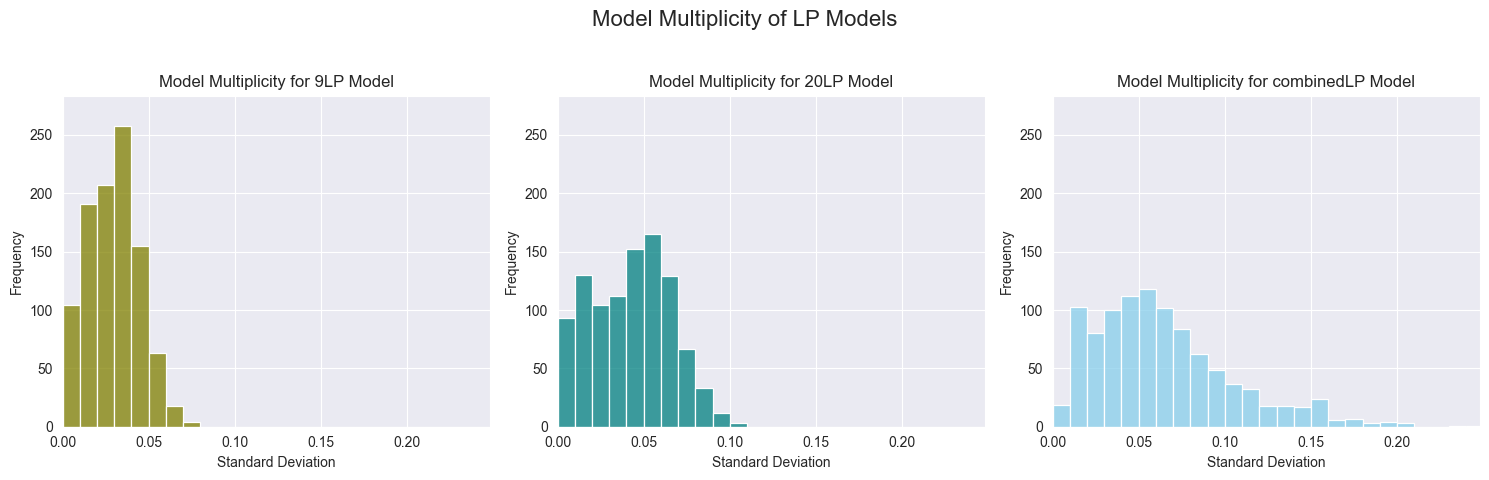

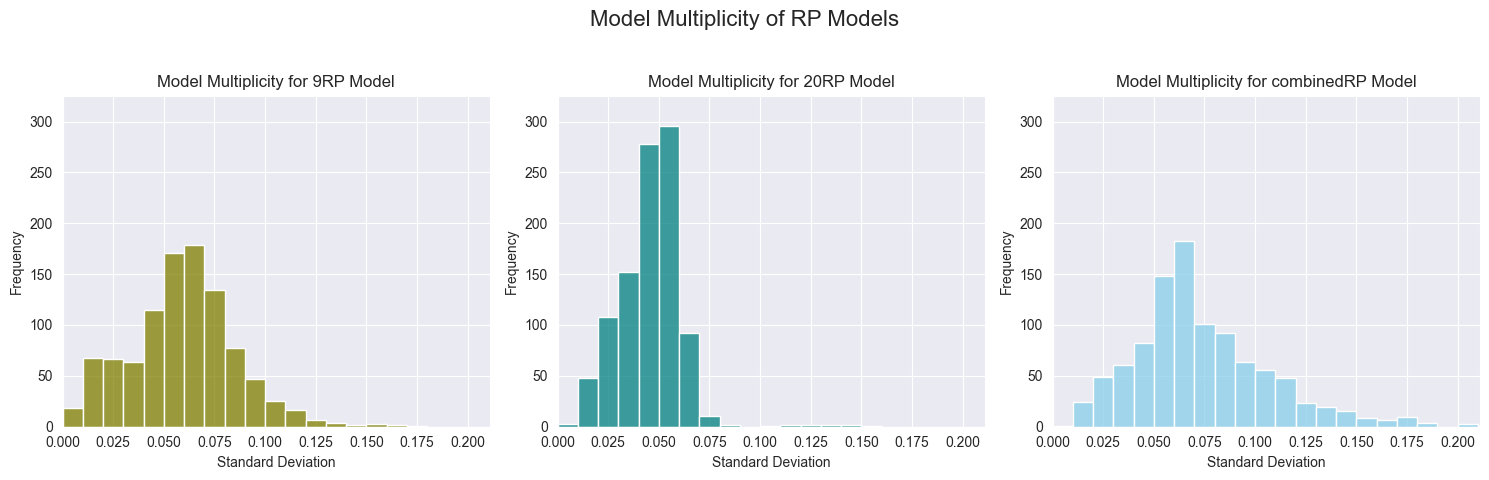

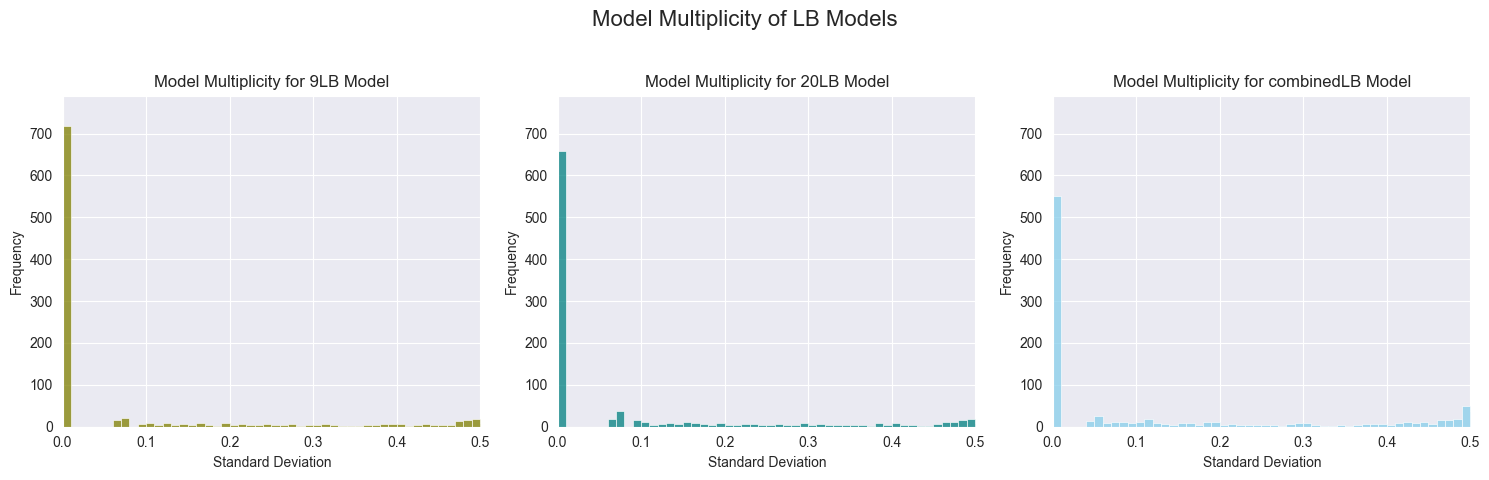

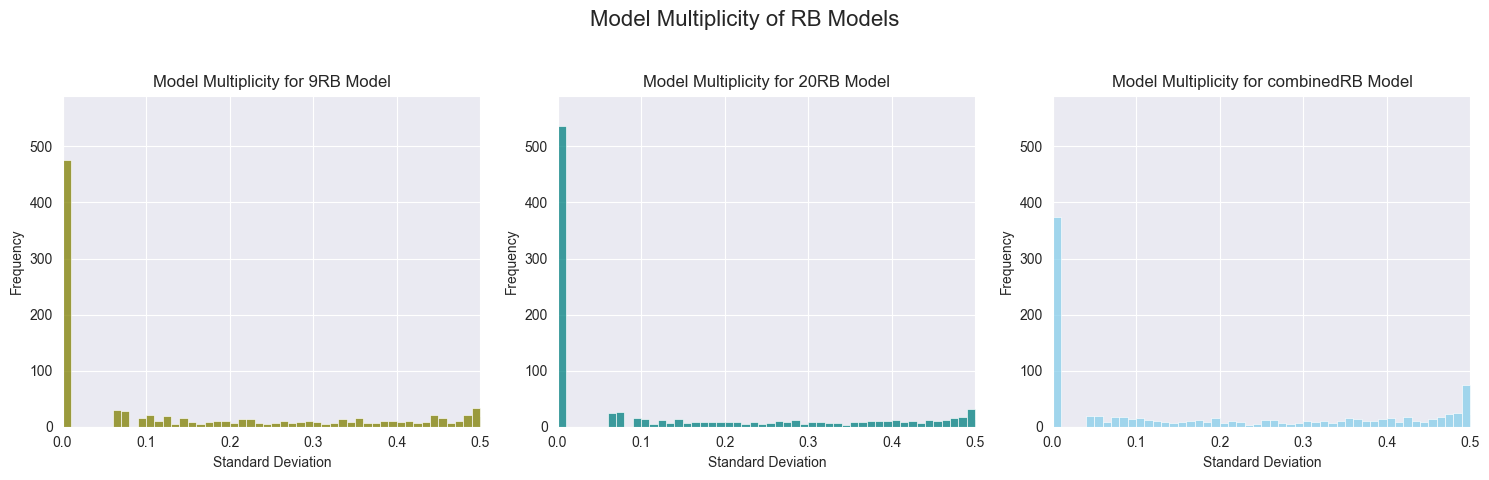

In [21]:
all_std = {}

suffixes = ['9', '20', 'combined'] 

# model multiplicity for each model (i.e. 2LP, 9RP etc.) and for each combined predictions (i.e. combinedLP, combinedRP etc.)
for model_type in model_types:
    std_columns = [stats[model_type][feature_number]['std'] for feature_number in suffixes]
    all_std[model_type] = pd.concat(std_columns, axis=1)
    all_std[model_type].columns = [f'std_{suffix}' for suffix in suffixes]
    plot_all_multiplicity({model_type: all_std[model_type]}, suffixes, colors=['olive', 'teal', 'skyblue', 'gold'])


### Mean Distribution

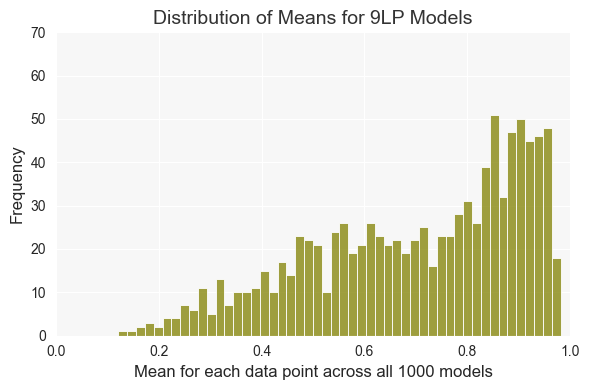

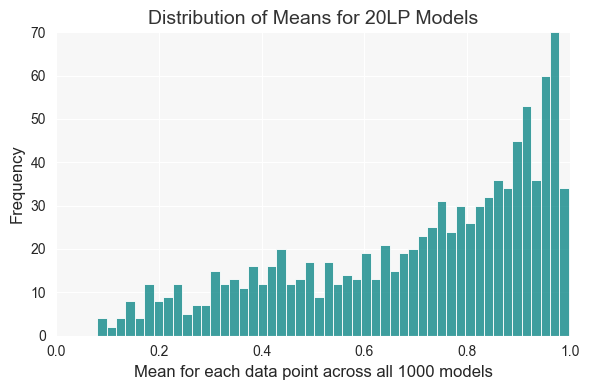

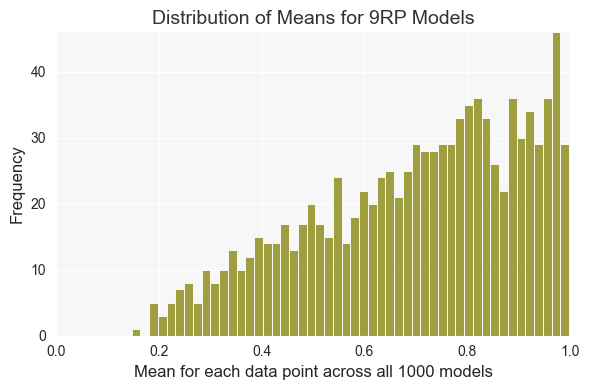

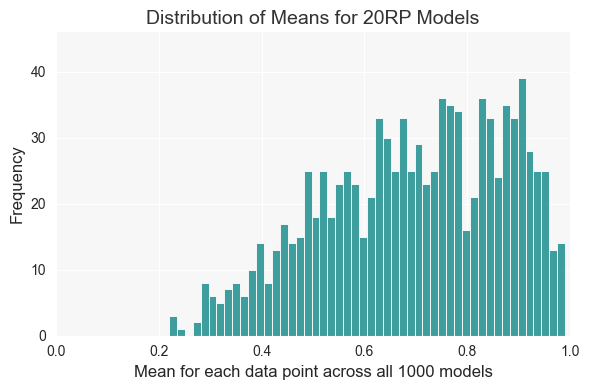

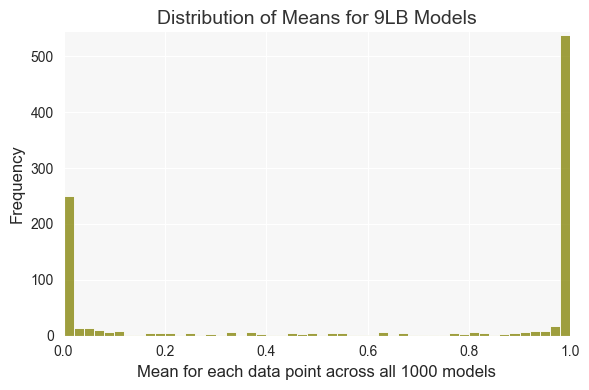

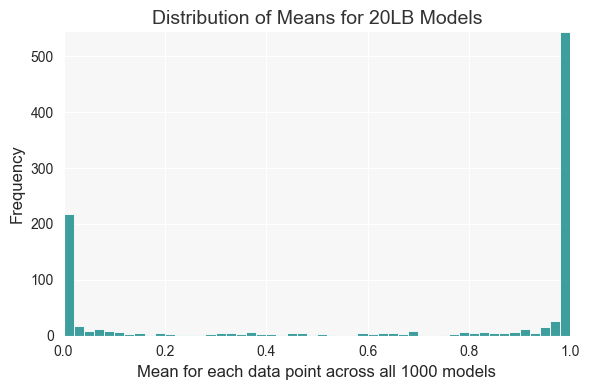

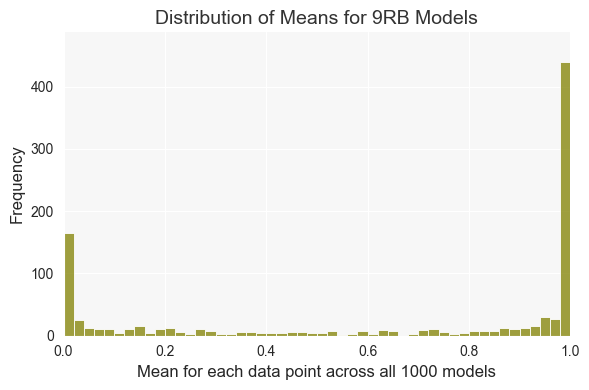

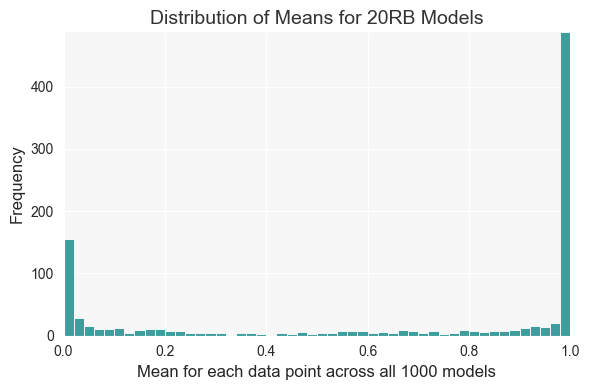

In [22]:
means = {}

# mean distributions
for model_type in model_types:
    mean_columns = [stats[model_type][feature_number]['mean'] for feature_number in feature_numbers]
    means[model_type] = pd.concat(mean_columns, axis=1)
    means[model_type].columns = [f'mean_{suffix}' for suffix in feature_numbers]
    plot_all_mean_distributions(means[model_type], feature_numbers, model_type, colors=['olive', 'teal'])

#print(combined_mean['LP'])
#print(combined_mean['RP'])

### Distribution of Differences of Means

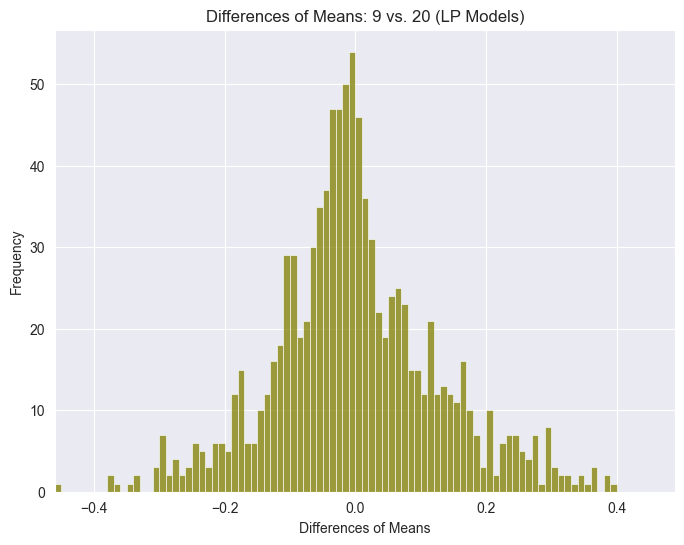

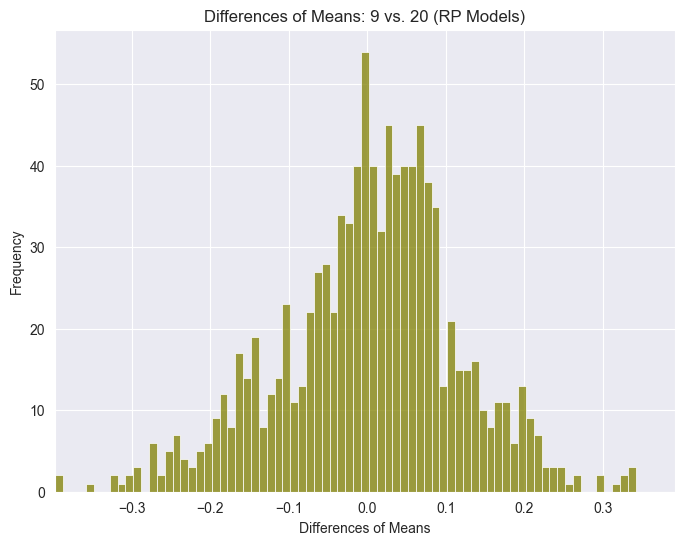

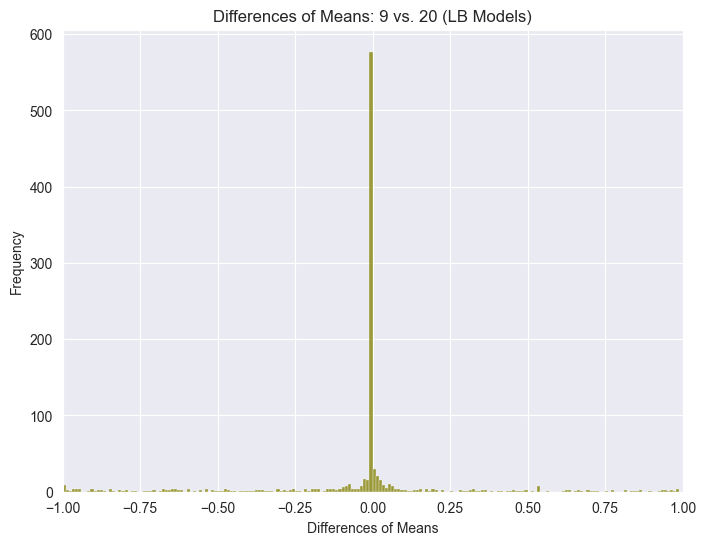

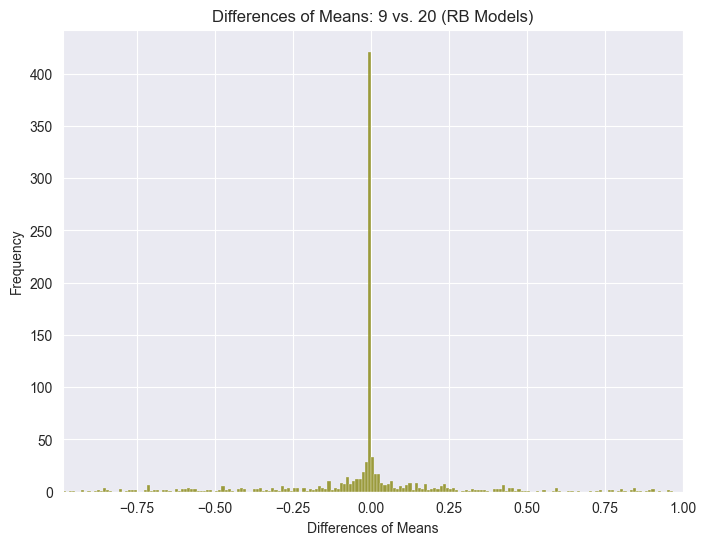

In [23]:
mean_diff = {model_type: {} for model_type in model_types}

# mean differences for 9 vs. 20
for model_type in model_types:
    mean_diff[model_type]['diff_9vs20'] = compute_mean_differences(
        means[model_type], 'mean_9', 'mean_20', feature_1='9', feature_2='20'
    )

combined_mean_diff = {model_type: mean_diff[model_type]['diff_9vs20'] for model_type in model_types}

for model_type in model_types:
    plot_all_differences_histograms(
        mean_diffs={model_type: combined_mean_diff[model_type]}, 
        model_types=[model_type], 
        differences=['diff_9vs20'],
        plot_description_comp=['9 vs. 20'],
        colors=['olive']
    )

### Absolute Differences of Means




\begin{align}
\text{Absolute Difference of Means} = \left| \frac{1}{N} \sum_{i=1}^{N} M_i^{F_1, T}(x) - \frac{1}{N} \sum_{i=1}^{N} M_i^{F_2, T}(x)\right|
\text{,} \quad F_1 \neq F_2  \notag

\end{align}



- $M_i^{F_1, T}(x)$ and $ M_i^{F_2, T} (x)$ are the predictions for individual $\mathit{x}$       from models with feature numbers $F_1$ and $F_2$, and model type T.

In [25]:
abs_mean_diff = {model_type: {} for model_type in model_types}

for model_type in model_types:
        abs_mean_diff[model_type]['diff_9vs20'] = absolute_mean_differences(means[model_type], 'mean_9', 'mean_20', feature_1='9', feature_2='20')

combined_abs_mean_diff = {model_type: abs_mean_diff[model_type]['diff_9vs20'] for model_type in model_types}

#print(combined_abs_mean_diff['LP'])
#print(combined_abs_mean_diff['RP'])
#print(combined_abs_mean_diff['RP'])

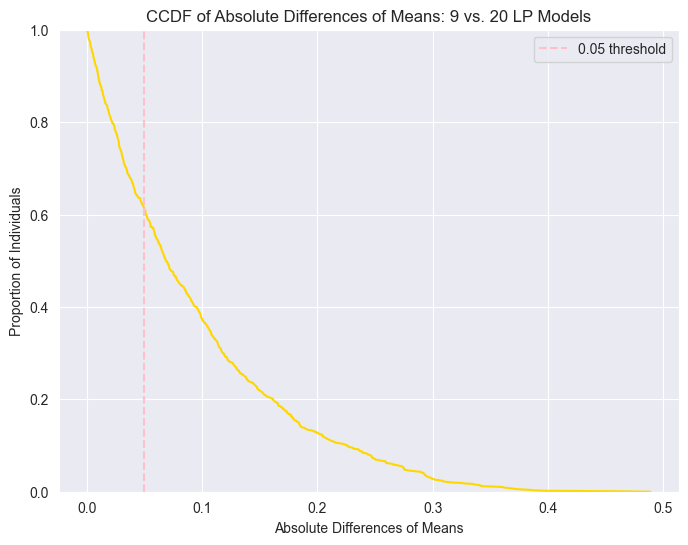

Percentage of points with at least 0.05 absolute difference in means: 61.10%



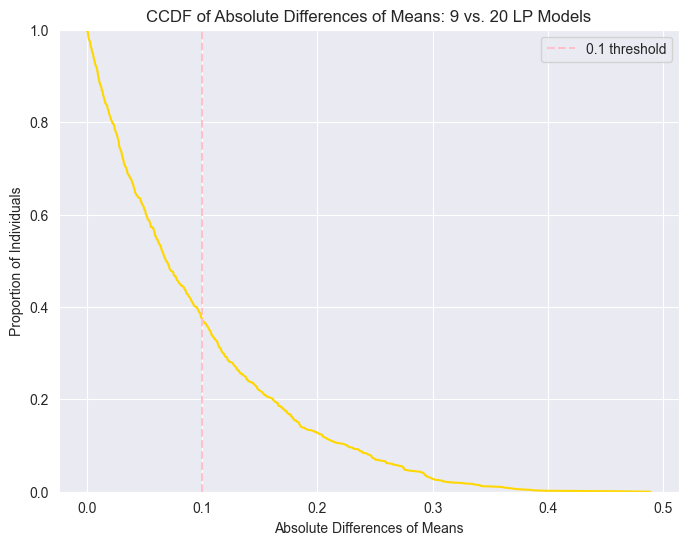

Percentage of points with at least 0.1 absolute difference in means: 37.60%



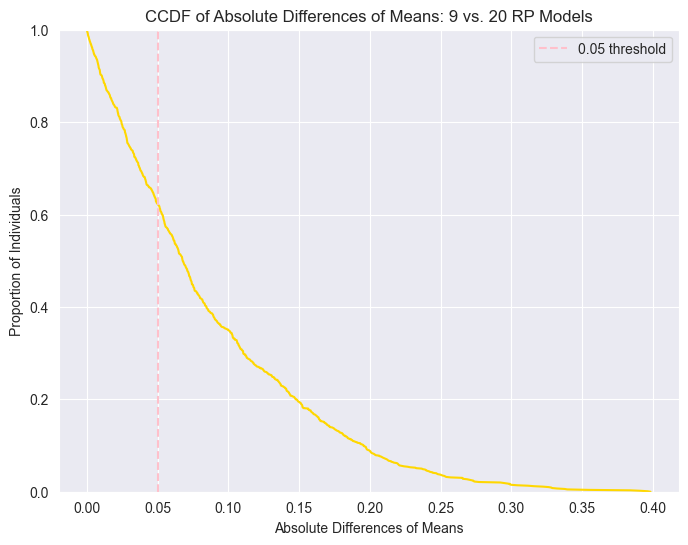

Percentage of points with at least 0.05 absolute difference in means: 62.40%



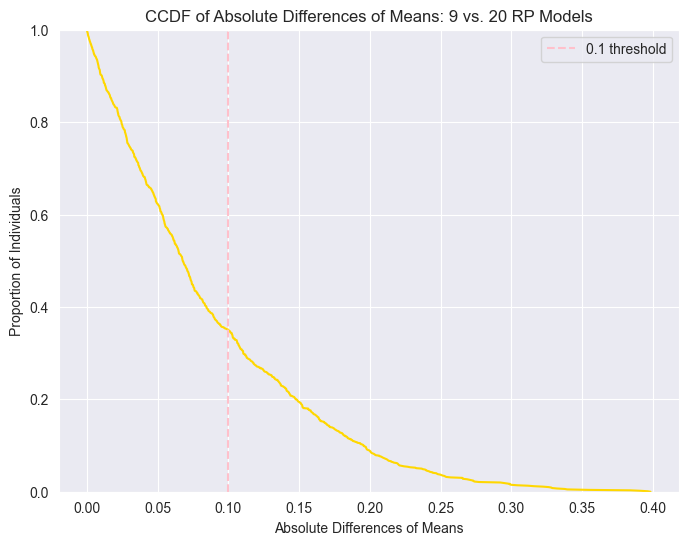

Percentage of points with at least 0.1 absolute difference in means: 35.00%



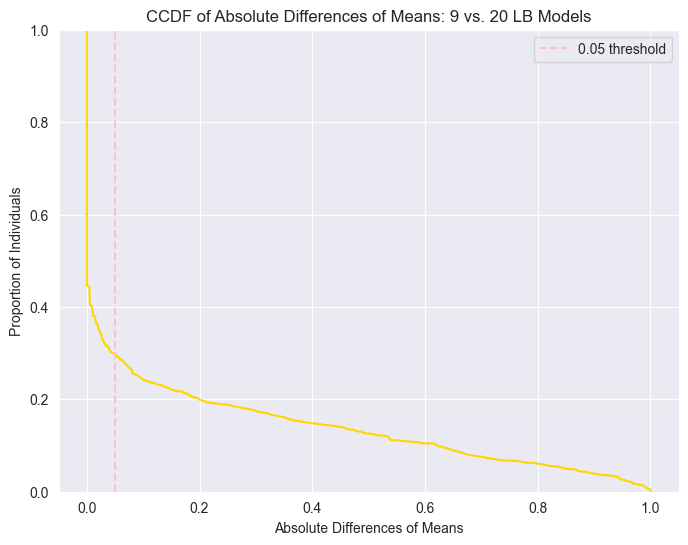

Percentage of points with at least 0.05 absolute difference in means: 29.90%



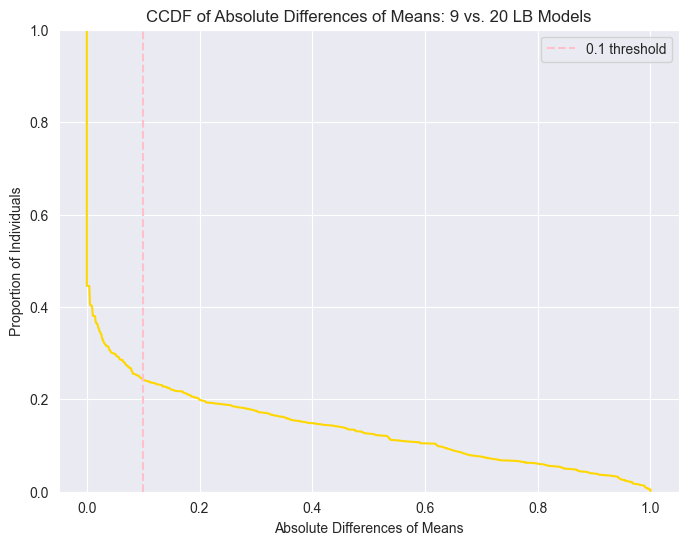

Percentage of points with at least 0.1 absolute difference in means: 24.40%



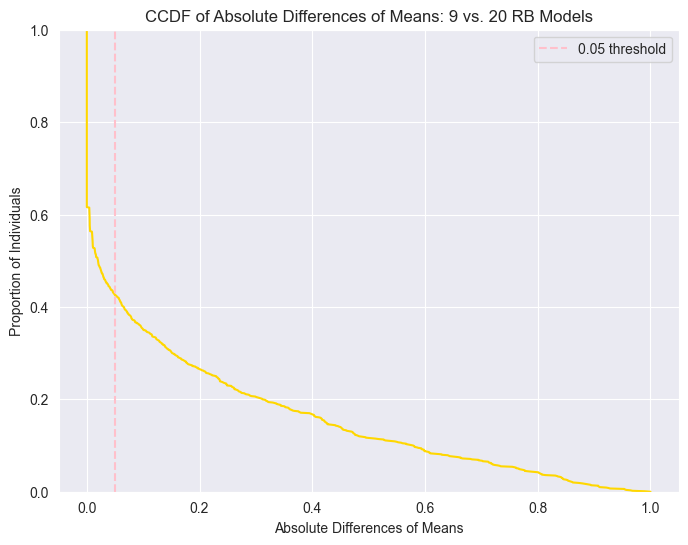

Percentage of points with at least 0.05 absolute difference in means: 42.70%



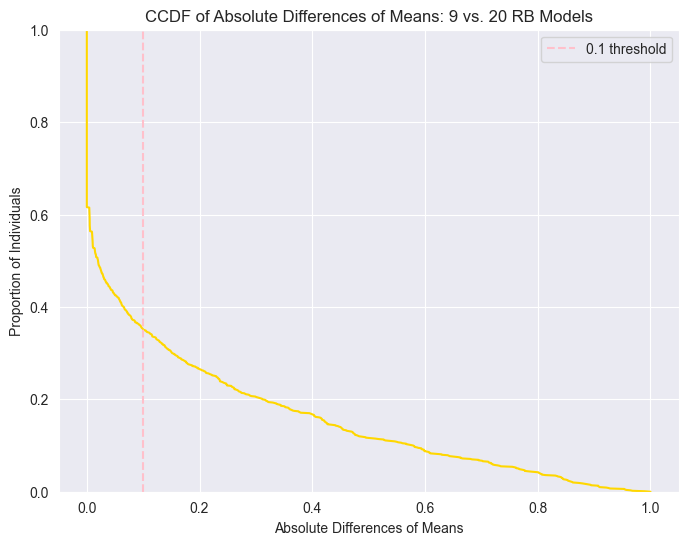

Percentage of points with at least 0.1 absolute difference in means: 35.20%



In [26]:
feature_pairs = [('abs_diff_9vs20', '9 vs. 20')]
thresholds = [0.05, 0.1]
diff_type = "abs_diff_of_means"
color = 'gold'  

for model_type in model_types:
    combinations = product(feature_pairs, thresholds)

    for feature_pair, threshold in combinations:
        feature, label = feature_pair

        plot_ccdf(
            data=combined_abs_mean_diff[model_type],
            column=feature,
            diff_type=diff_type,
            color=color, 
            threshold=threshold,
            feature_pair=label,
            model_type=model_type
        )

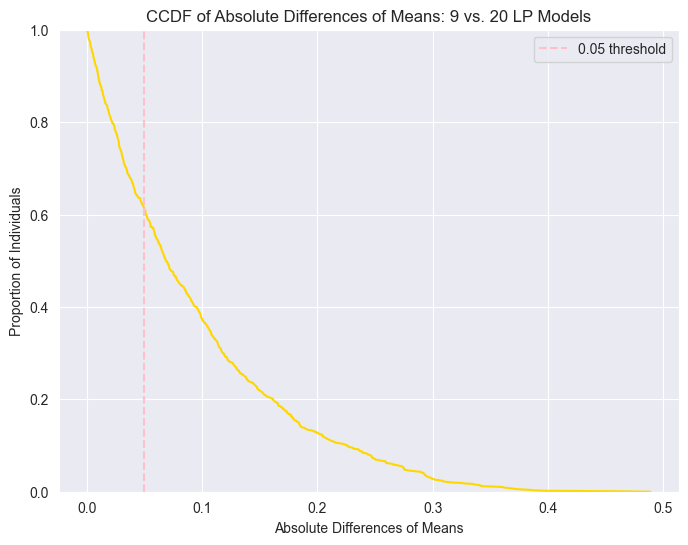

Percentage of points with at least 0.05 absolute difference in means: 61.10%



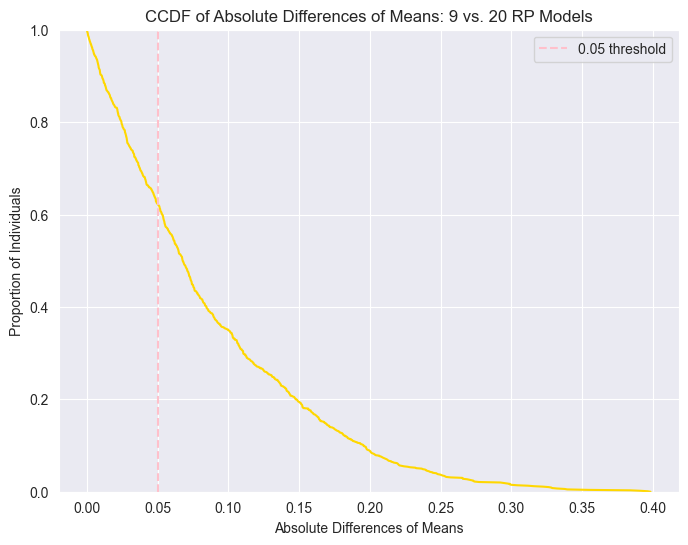

Percentage of points with at least 0.05 absolute difference in means: 62.40%



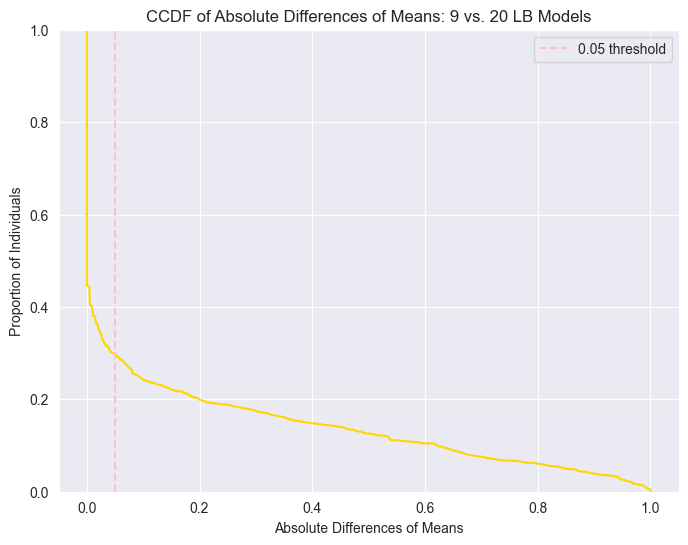

Percentage of points with at least 0.05 absolute difference in means: 29.90%



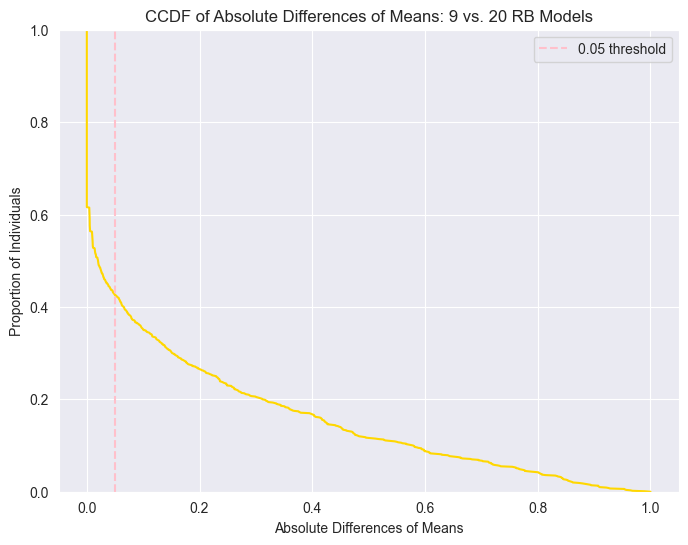

Percentage of points with at least 0.05 absolute difference in means: 42.70%



In [27]:
# CCDF for the absolute mean differences
feature_pairs = [('abs_diff_9vs20', '9 vs. 20')]
colors = ['gold']  
thresholds = [0.05, 0.1]  
diff_type ="abs_diff_of_means"

for model_type in model_types:
    plot_model_ccdf(combined_abs_mean_diff, model_type, diff_type, feature_pairs, colors, thresholds)


### Mean of Absolute Differences

\begin{align}
{\text{Mean of Absolute Differences}} = \frac{1}{N} \sum_{i=1}^{N} \left| M_i^{F_1, T}(x) - M_i^{F_2, T}(x) \right|
\text{,} \quad F_1 \neq F_2  \notag
\end{align}

In [28]:
mean_of_abs_diff = {model_type: {} for model_type in model_types}

for model_type in model_types:
    substring_1 = '9LM' if model_type in ('LP', 'LB') else '9RM'
    substring_2 = '20LM' if model_type in ('LP', 'LB') else '20RM'

    abs_diff = compute_absolute_difference(
        df['9'][model_type], 
        df['20'][model_type], 
        substring_1=substring_1, 
        substring_2=substring_2
    )

    # row statistics for absolute differences
    mean_of_abs_diff[model_type]['diff_9vs20'] = compute_row_stats(abs_diff)['mean']

combined_mean_of_abs_diff = {
    model_type: pd.DataFrame({
        "diff_9vs20": mean_of_abs_diff[model_type]['diff_9vs20']
    })
    for model_type in model_types
}


In [29]:
#for model_type, df in combined_mean_of_abs_diff.items():
#    print(f"Combined DataFrame for {model_type}:")
#   print(df.head())

In [30]:
#print(combined_mean_of_abs_diff['RP'])
#print(combined_mean_of_abs_diff['LP'])

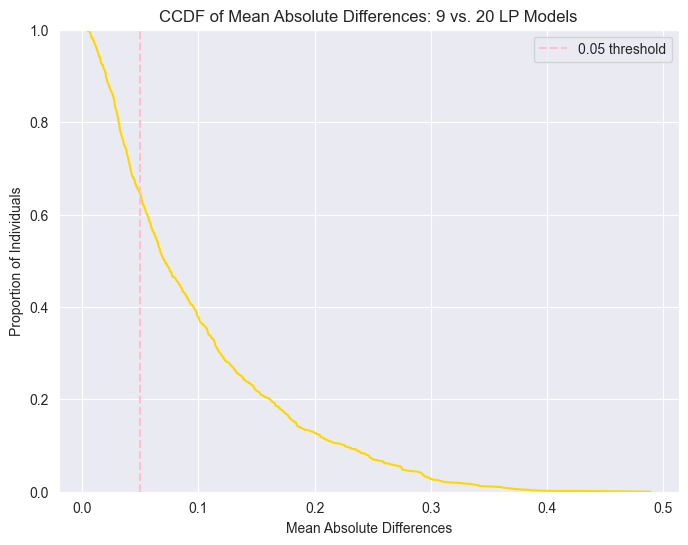

Percentage of points with at least 0.05 absolute difference in means: 64.50%



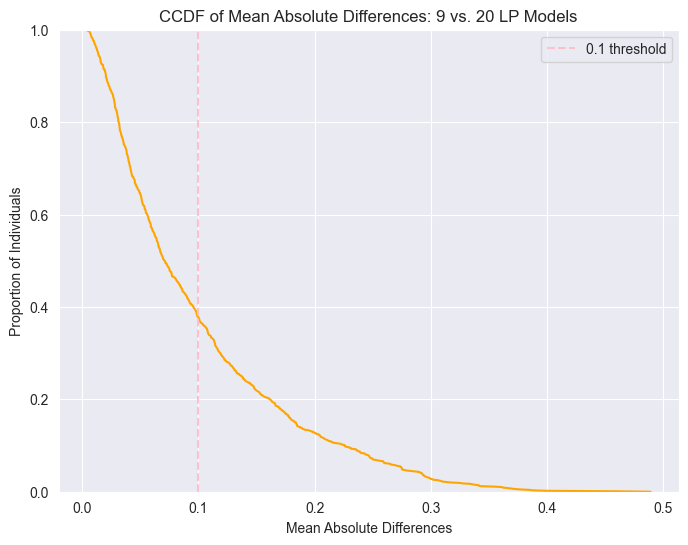

Percentage of points with at least 0.1 absolute difference in means: 37.80%



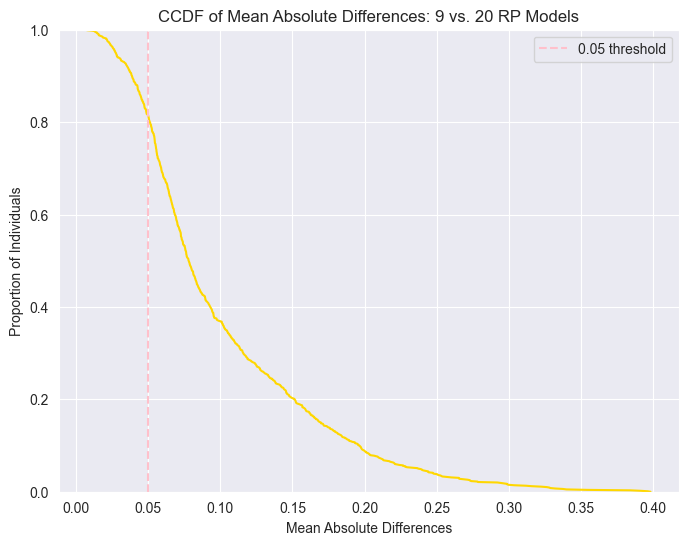

Percentage of points with at least 0.05 absolute difference in means: 81.50%



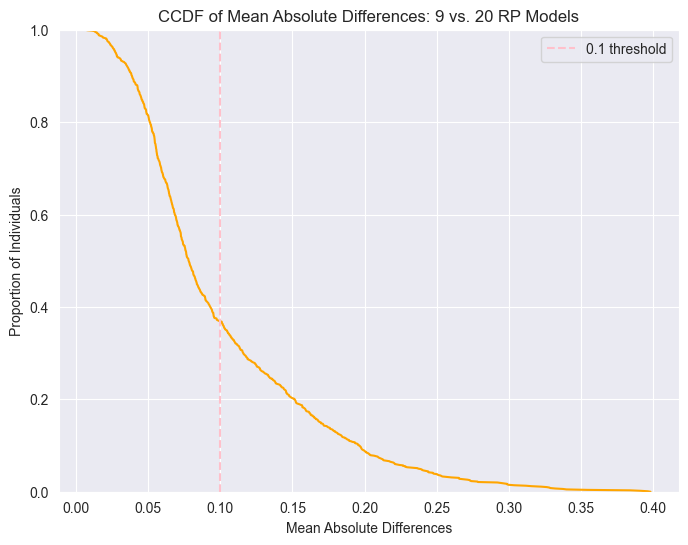

Percentage of points with at least 0.1 absolute difference in means: 36.90%



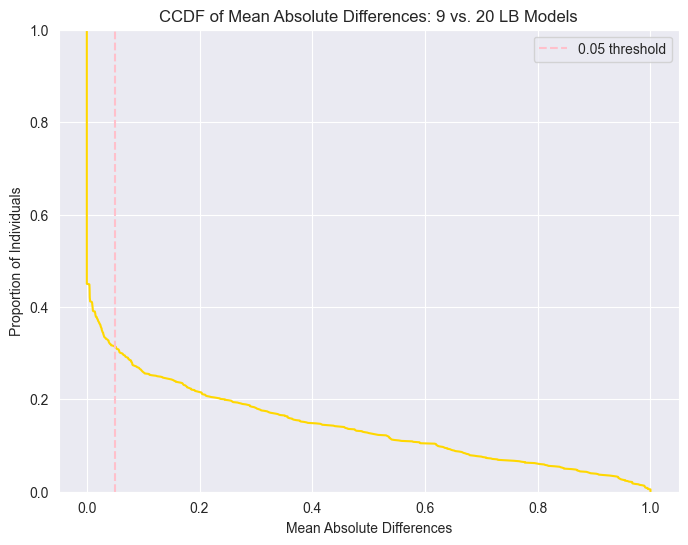

Percentage of points with at least 0.05 absolute difference in means: 31.50%



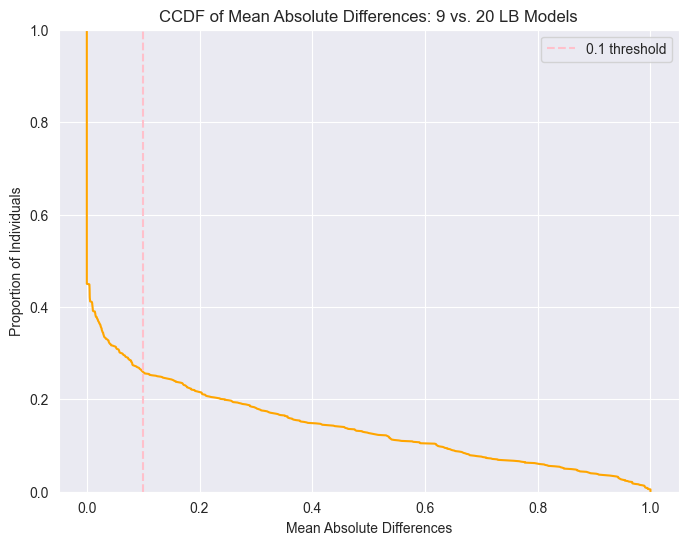

Percentage of points with at least 0.1 absolute difference in means: 26.00%



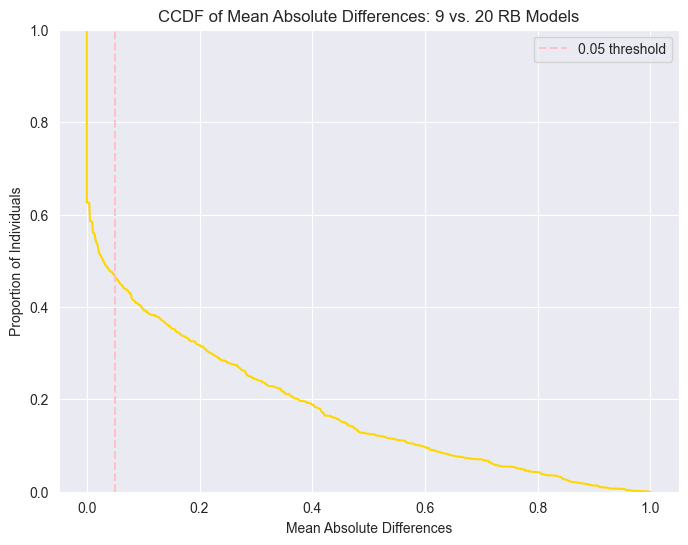

Percentage of points with at least 0.05 absolute difference in means: 46.60%



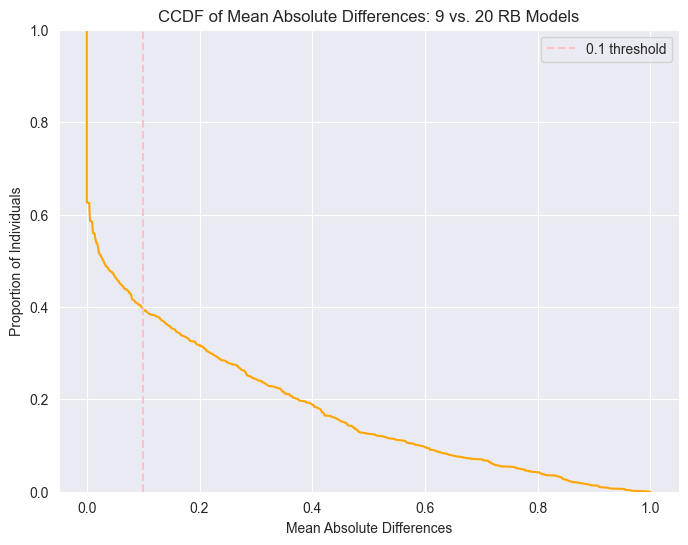

Percentage of points with at least 0.1 absolute difference in means: 39.50%



In [31]:
# CCDF for the absolute mean differences
feature_pairs = [('diff_9vs20', '9 vs. 20')]
colors = ['gold']  
thresholds = [0.05, 0.1] 
diff_type ="mean_of_abs_diff"

threshold_color_map = {
    0.05: 'gold',
    0.1: 'orange'
}

for model_type in model_types:
    combinations = product(feature_pairs, thresholds)

    for feature_pair, threshold in combinations:
        feature, label = feature_pair
        color = threshold_color_map.get(threshold, 'gray') 

        plot_ccdf(
            data=combined_mean_of_abs_diff[model_type],
            column=feature,
            diff_type=diff_type,
            color=color,
            threshold=threshold,
            feature_pair=label,
            model_type=model_type
        )